# Python Project
## ABC Company Employee Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv("Downloads/myexcel - myexcel.csv.csv")
file.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [8]:
file.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [5]:
"""Correct the data in the "height" column by replacing it with random numbers between 150 and 180. 
Ensure data consistency and integrity before proceeding with analysis"""

np.random.seed(42)
file['height'] = np.random.randint(150, 181, size=len(file))

file['height'].head()

0    156
1    169
2    178
3    164
4    160
Name: height, dtype: int32

In [12]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
 9   height    458 non-null    int32  
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.1+ KB


In [7]:
file.fillna({'College':'Unknown'}, inplace=True)

In [9]:
median_salary = file['Salary'].median()
file.fillna({ 'Salary': median_salary}, inplace=True)

In [11]:
file.isnull().sum().sum()

0

In [17]:
"""1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees"""

team_distribution = file['Team'].value_counts()
team_percentage = (team_distribution / len(file)) * 100

print(f'The Team Distribution is: {team_distribution}')

The Team Distribution is: Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64


In [19]:
print(f'The Team percentage is: {team_percentage}')

The Team percentage is: Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          

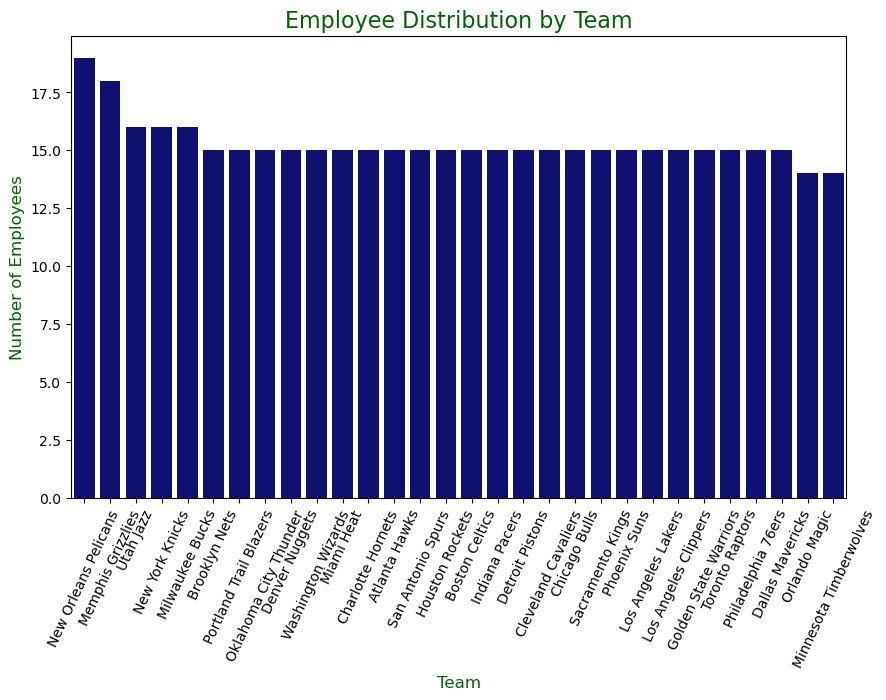

In [21]:
# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=team_distribution.index, y=team_distribution.values,color='navy')
plt.title('Employee Distribution by Team',fontsize=16,color='darkgreen')
plt.xlabel('Team',fontsize=12,color='darkgreen')
plt.ylabel('Number of Employees',fontsize=12,color='darkgreen')
plt.xticks(rotation=65)
plt.show()

**Insight:** 
The employee distribution across the various teams in ABC Company reveals which departments have a larger workforce and potentially more focus or priority. The team with the largest number of employees is New Orleans Pelicans, accounting for 4.15 % of the total employees. This suggests that New Orleans Pelicans might be a core department in the company, requiring a larger number of staff for its operations. On the other hand, the team with the smallest workforce, Orlando Magic and Minnesota Timberwolves , makes up only 3.05 % of the total employees, which could indicate a smaller or more specialized department within the organization.

**Trend**:
 The variation in team sizes could also reflect the company’s strategic priorities. A larger team might indicate an expansion or a critical operational need, while a smaller team could indicate a more focused, specialized role or a department in early development stages.

In [24]:
"""2. Segregate employees based on their positions within the company."""

position_distribution = file['Position'].value_counts()
position_distribution

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

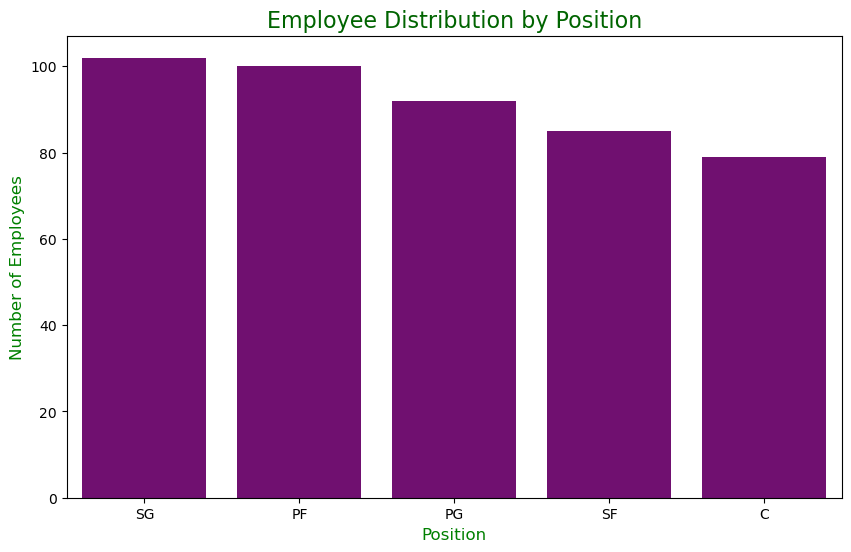

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=position_distribution.index, y=position_distribution.values,color='purple')
plt.title('Employee Distribution by Position',fontsize=16,color='darkgreen')
plt.xlabel('Position',fontsize=12,color='green')
plt.ylabel('Number of Employees',fontsize=12,color='green')
plt.xticks(rotation=0)
plt.show()

**Insight:**
The distribution of employees by position reveals the hierarchy and role focus within the company. The most common position is SG, with 102 employees in this role, which may suggest that SG is a standard or foundational role within the company. Conversely, positions like C, which have the fewest employees, may indicate either senior roles, specialized expertise, or roles that require less frequent staffing.

**Trend:**
A high concentration of employees in one position could reflect a role central to the company’s core operations, while fewer employees in certain roles could indicate more specialized or higher-level positions.

In [32]:
"""3. Identify the predominant age group among employees."""

bins = [18, 25, 35, 45, 60]
labels = ['18-24', '25-34', '35-44', '45-60']
file['Age_Group'] = pd.cut(file['Age'], bins=bins, labels=labels)

age_distribution = file['Age_Group'].value_counts()
print(age_distribution)

Age_Group
25-34    235
18-24    200
35-44     23
45-60      0
Name: count, dtype: int64


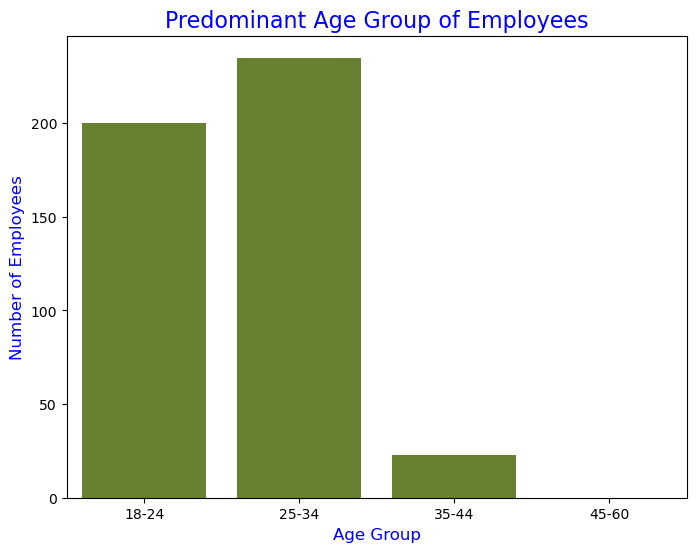

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values,color='olivedrab')
plt.title('Predominant Age Group of Employees',fontsize=16,color='blue')
plt.xlabel('Age Group',fontsize=12,color='blue')
plt.ylabel('Number of Employees',fontsize=12,color='blue')
plt.show()

**Insight:** 
The company’s workforce shows a predominance of employees in the age group 25-34, making up 51.3 % of the total workforce. This suggests that ABC Company may attract a younger workforce, potentially indicating an emphasis on innovation, energy, and new ideas that younger employees typically bring. Alternatively, a larger proportion of employees in the 35-44 might signal a more experienced workforce with significant expertise.

**Trend:**
The age group distribution also sheds light on the company’s hiring strategies. A younger workforce might suggest the company is focused on fresh talent, while a more experienced workforce could indicate that the company values seasoned professionals.

In [40]:
"""4. Discover which team and position have the highest salary expenditure."""

salary_by_team = file.groupby('Team')['Salary'].sum()
salary_by_position = file.groupby('Position')['Salary'].sum()

print("Highest Salary by Team:", salary_by_team.idxmax(), salary_by_team.max())
print("Highest Salary by Position:", salary_by_position.idxmax(), salary_by_position.max())

Highest Salary by Team: Cleveland Cavaliers 109824875.0
Highest Salary by Position: C 466377332.0


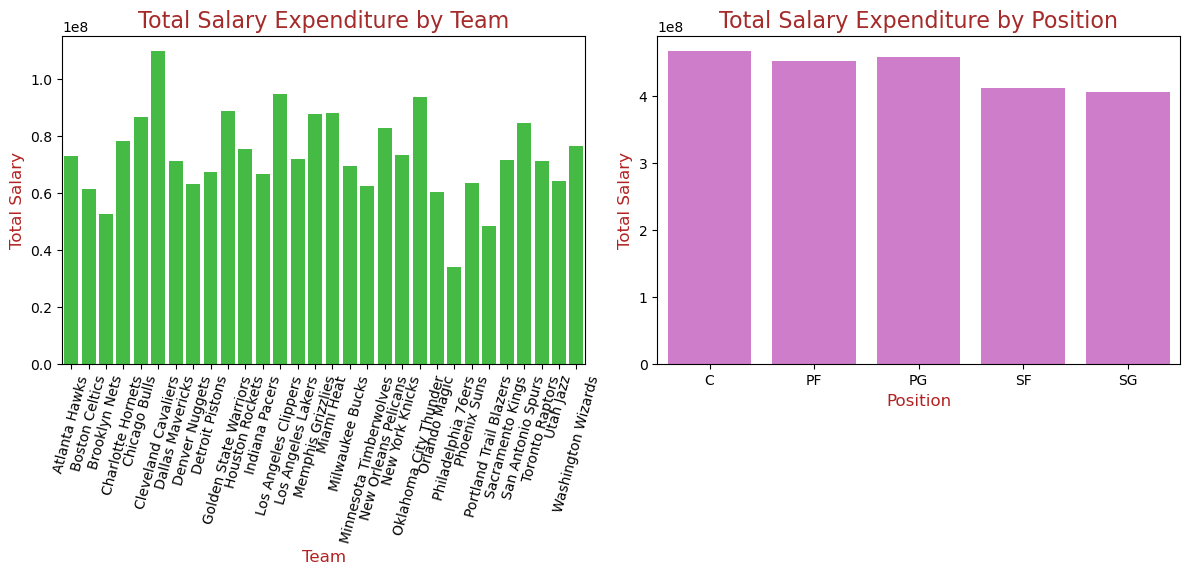

In [46]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=salary_by_team.index, y=salary_by_team.values,color='limegreen')
plt.title('Total Salary Expenditure by Team',fontsize=16,color='brown')
plt.xlabel('Team',fontsize=12,color='firebrick')
plt.ylabel('Total Salary',fontsize=12,color='firebrick')
plt.xticks(rotation=75)

plt.subplot(1, 2, 2)
sns.barplot(x=salary_by_position.index, y=salary_by_position.values,color='orchid')
plt.title('Total Salary Expenditure by Position',fontsize=16,color='brown')
plt.xlabel('Position',fontsize=12,color='firebrick')
plt.ylabel('Total Salary',fontsize=12,color='firebrick')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**Insight:**
The team with the highest salary expenditure is Cleveland Cavaliers, which could indicate a team that requires highly skilled professionals or more senior roles with higher compensation packages. The high salary expenditure in this team suggests the company's investment in C. This is likely a strategic decision to attract top-tier talent or to maintain a high level of expertise in this area.
Similarly, the position with the highest salary expenditure is C, which could indicate that roles in this position demand extensive experience, expertise, or responsibility. This is consistent with positions like PG and PF that typically attract higher salaries due to the level of leadership or specialized skills required.

**Trend:** 
High salary expenditure can point to areas where the company is focusing resources on acquiring or retaining top talent. It may also suggest the company's recognition of the importance of certain roles or teams in achieving its business goals.

In [48]:
"""5. Investigate if there's any correlation between age and salary, and represent it visually. """

correlation = file['Age'].corr(file['Salary'])
print(f"Correlation between Age and Salary: {correlation:.2f}")


Correlation between Age and Salary: 0.21


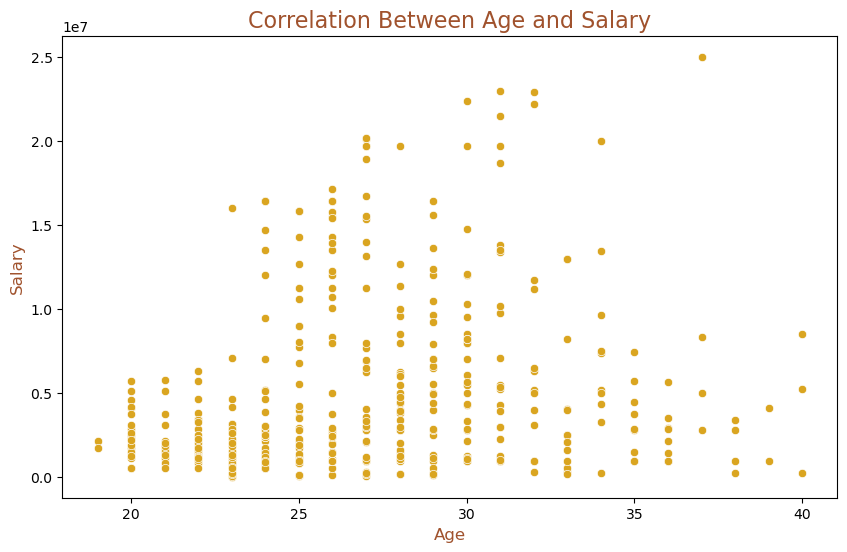

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=file,color='goldenrod')
plt.title('Correlation Between Age and Salary',fontsize=16,color='sienna')
plt.xlabel('Age',fontsize=12,color='sienna')
plt.ylabel('Salary',fontsize=12,color='sienna')
plt.show()

**Insight:** 
The correlation between age and salary in ABC Company is positive, with a value of 0.21. This indicates that, as employees age, their salaries tend to increase, suggesting that the company’s compensation strategy rewards seniority. A strong positive correlation might mean that senior employees are compensated better as they progress in their careers within the company. A weak or negative correlation could suggest a more merit-based or performance-driven approach to salary, rather than simply rewarding tenure.

**Trend:**
A strong correlation between age and salary typically suggests that the company places value on experience and longer tenure, compensating employees accordingly. If the correlation is weak or negative, it might indicate that the company places more emphasis on skills, performance, or role-specific requirements rather than simply rewarding age or experience.


### **Conclusion**

In this project, we thoroughly explored the employee dataset from ABC Company, performing data preprocessing, conducting detailed analysis, and presenting our findings with meaningful visualizations. Here’s a summary of the key takeaways:

1. **Data Preprocessing**: We successfully handled missing values in key columns like `"college"` and `"salary"`, ensuring the integrity of the dataset for analysis. Additionally, the `"height"` column was corrected by replacing it with random values between 150 and 180 to maintain consistency across the dataset.

2. **Employee Distribution and Insights**: Our analysis showed that the company has a varied workforce across different teams and positions. The team with the highest number of employees reflects the company's strategic focus on that department, while a smaller team indicates a more specialized or developing area. The distribution of positions also highlighted that certain roles are fundamental to the company's core operations.

3. **Age and Salary Trends**: The age group distribution revealed that ABC Company has a youthful workforce, likely attracting talent for innovation and adaptability. The analysis also demonstrated a correlation between age and salary, suggesting that experience and seniority play a key role in the company’s compensation strategy.

4. **Salary Expenditure Insights**: Teams and positions with the highest salary expenditures align with strategic areas requiring high levels of expertise or senior leadership. These roles are critical to the company’s success and reflect its investment in retaining top talent.

5. **Actionable Insights**: The data provides valuable insights into the company’s workforce strategy, highlighting areas where resources are being allocated heavily and indicating the importance of specific teams or positions. These findings can guide future recruitment, retention, and compensation strategies, ensuring that the company remains competitive in attracting and retaining skilled employees.

In conclusion, this analysis of ABC Company's employee data provides a comprehensive understanding of the company's workforce distribution, salary trends, and employee demographics. These insights not only help the company identify areas for potential improvement but also offer strategic direction for optimizing staffing and resource allocation moving forward.